## Library

In [44]:
import warnings
warnings.filterwarnings('ignore')

In [45]:
import pandas as pd
import numpy as np

In [46]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.neighbors import NearestNeighbors

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [49]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [50]:
from sklearn.metrics import r2_score

In [51]:
from sklearn.metrics import mean_squared_error

In [52]:
import statsmodels.api as sm

In [53]:
from sklearn.model_selection import RandomizedSearchCV

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
from pprint import pprint

In [1]:
!cd

C:\Users\ashut\Desktop\BTP\website_flask


In [2]:
cd\Users\ashut\Desktop\BTP

C:\Users\ashut\Desktop\BTP


In [3]:
%cd 

C:\Users\ashut


---------
## Data

#### Train, Test Data

In [56]:
trdf=pd.read_csv(r'C:\Users\ashut\Desktop\BTP\website_flask\03_Train_Data.csv', index_col=0)

In [57]:
tedf = pd.read_csv(r'C:\Users\ashut\Desktop\BTP\website_flask\03_Test_Data.csv', index_col=0)

In [58]:
trdf.set_index('Lateral_ID (i)', inplace = True)

In [59]:
tedf.set_index('Lateral_ID (i)', inplace = True)

In [60]:
trdf.sort_index(inplace = True)

In [61]:
tedf.sort_index(inplace = True)

In [62]:
trdf

,~y(1)(i),~y(2)(i),~y(3)(i),~y(4)(i),N(i),Lateral Anomaly Status x(i),Affected Customers s(i)
Lateral_ID (i),,,,,,,
1,0,0,0,1,3,1,0.666667
2,0,14,0,56,40,2,0.650000
3,0,0,0,0,16,0,0.000000
4,0,0,4,8,19,1,0.631579
5,0,0,0,0,8,0,0.000000
...,...,...,...,...,...,...,...
2496,0,0,0,0,9,0,0.000000
2497,0,14,32,52,33,2,0.818182
2498,0,0,7,17,36,1,0.805556


In [63]:
tedf

,~y(1)(i),~y(2)(i),~y(3)(i),~y(4)(i),N(i),Lateral Anomaly Status x(i),Affected Customers s(i)
Lateral_ID (i),,,,,,,
12,0,0,0,0,42,0,0.000000
15,0,0,0,0,22,0,0.000000
24,0,0,0,0,42,0,0.000000
25,0,4,0,14,12,2,0.500000
42,0,0,0,0,31,0,0.000000
...,...,...,...,...,...,...,...
2472,0,21,52,76,49,2,0.938776
2476,0,0,0,0,7,0,0.000000
2482,0,17,45,74,44,2,0.795455


In [64]:
tedf.columns

Index(['~y(1)(i)', '~y(2)(i)', '~y(3)(i)', '~y(4)(i)', 'N(i)',
       'Lateral Anomaly Status x(i)', 'Affected Customers s(i)'],
      dtype='object')

In [65]:
X_tr = np.array(trdf[['~y(1)(i)', '~y(2)(i)', '~y(3)(i)', '~y(4)(i)']])

In [66]:
X_tr.shape

(2000, 4)

In [67]:
y_tr = np.array(trdf[[  'Affected Customers s(i)', 'Lateral Anomaly Status x(i)']])

In [68]:
y_tr.shape

(2000, 2)

In [69]:
X_te = np.array(tedf[['~y(1)(i)', '~y(2)(i)', '~y(3)(i)', '~y(4)(i)']])

In [70]:
X_te.shape

(500, 4)

In [71]:
y_te = np.array(tedf[['Affected Customers s(i)', 'Lateral Anomaly Status x(i)']])

In [72]:
y_te.shape

(500, 2)

In [73]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


--------------
--------------
## 1) Base Model : RF Regressor
- x(i)
- s(i)

In [74]:
# use an odd number of trees to prevent predictions of 0.5
rf = RandomForestRegressor(n_estimators=11)


In [75]:
rf.fit(X_tr, y_tr)


RandomForestRegressor(n_estimators=11)

In [76]:
y_pred = rf.predict(X_te)

In [77]:


# all predictions will be continous so just round the continous ones
y_pred[:, 1] = y_pred[:, 1].round()

## Results:

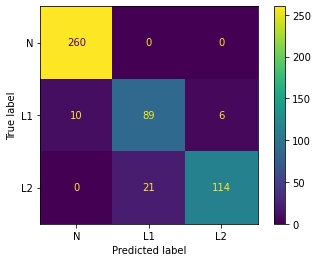

In [78]:
cm = confusion_matrix(y_te[:,1], y_pred[:,1], labels=[0,1,2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=['N', 'L1', 'L2'])
disp.plot()

In [79]:
accuracy_score(y_te[:,1], y_pred[:,1]) 

0.926

In [80]:
f1_score(y_te[:,1], y_pred[:,1], average='weighted') 

0.9254609090674444

In [81]:
precision_score(y_te[:,1], y_pred[:,1], average='weighted') 

0.9271498316498317

In [82]:
recall_score(y_te[:,1], y_pred[:,1], average='weighted') 

0.926

In [83]:
r2_score(y_te[:,0], y_pred[:,0])

0.6307291573410339

In [84]:
dfff = pd.DataFrame({
    'ID': tedf.index,
    'true s(i)': y_te[:,0],
    'predicted s(i)': y_pred[:,0],
    'true x(i)': y_te[:,1],
    'predicted x(i)': y_pred[:,1]
})

In [85]:
dfff.set_index('ID', inplace = True)

array([[<AxesSubplot:title={'center':'true s(i)'}>,
        <AxesSubplot:title={'center':'predicted s(i)'}>],
       [<AxesSubplot:title={'center':'true x(i)'}>,
        <AxesSubplot:title={'center':'predicted x(i)'}>]], dtype=object)

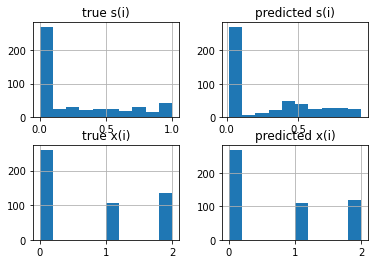

In [86]:
dfff.hist()

--------------
--------------
## 2) Model : improving s(i) through x(i) 
- RF classifier, x(i)
- RF regressor, s(i)

In [87]:
rf2 = RandomForestClassifier()

In [88]:
%%time
# Fit the random search model
rf2.fit(X_tr, y_tr[:,1])

CPU times: total: 297 ms
Wall time: 378 ms


RandomForestClassifier()

In [89]:
y_pred21 = rf2.predict(X_te)

## Results:

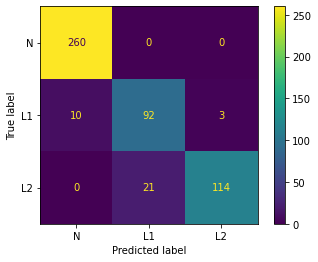

In [90]:
cm = confusion_matrix(y_te[:,1], y_pred21, labels=[0,1,2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=['N', 'L1', 'L2'])
disp.plot()

In [91]:
accuracy_score(y_te[:,1], y_pred21) 

0.932

In [92]:
f1_score(y_te[:,1], y_pred21, average='weighted') 

0.9317220999530157

In [93]:
precision_score(y_te[:,1], y_pred21, average='weighted') 

0.9347911151450975

In [94]:
recall_score(y_te[:,1], y_pred21, average='weighted') 

0.932

#### Training s(i) using original s(i), testing s(i) using predicted s(i)

In [95]:
X_tr2 = np.array(trdf[['~y(1)(i)', '~y(2)(i)', '~y(3)(i)', '~y(4)(i)', 'Lateral Anomaly Status x(i)']])

In [96]:
y_tr2 = np.array(trdf['Affected Customers s(i)'])

In [97]:
y_te2 = np.array(tedf['Affected Customers s(i)'])

In [98]:
X_te2 = tedf[['~y(1)(i)', '~y(2)(i)', '~y(3)(i)', '~y(4)(i)']]

In [99]:
X_te2['predicted x(i)'] = y_pred21

In [100]:
X_te2 = np.array(X_te2)

In [101]:
# use an odd number of trees to prevent predictions of 0.5
rf22 = RandomForestRegressor(n_estimators=11)


In [102]:
rf22.fit(X_tr2, y_tr2)


RandomForestRegressor(n_estimators=11)

In [103]:
y_pred22 = rf22.predict(X_te2)

In [104]:
r2_score(y_te2, y_pred22)

0.6370855186071344

In [105]:
dfff = pd.DataFrame({
    'ID': tedf.index,
    'true s(i)': y_te2,
    'predicted s(i)': y_pred22,
})

In [106]:
dfff.set_index('ID', inplace = True)

array([[<AxesSubplot:title={'center':'true s(i)'}>,
        <AxesSubplot:title={'center':'predicted s(i)'}>]], dtype=object)

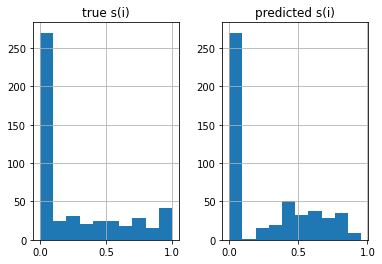

In [107]:
dfff.hist()

slightly improved

#### Training s(i) using x(i): with cross validation

In [108]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [77]:
%%time
# Fit the random search model
rf_random.fit(X_tr2, y_tr2)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


KeyboardInterrupt: 

In [198]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [199]:
best_random = rf_random.best_estimator_

In [200]:
y_predr = best_random.predict(X_te2)

In [201]:
r2_score(y_te2, y_predr)

0.6842051045350324

In [202]:
dfff = pd.DataFrame({
    'ID': tedf.index,
    'true s(i)': y_te2,
    'predicted s(i)': y_predr,
})

In [203]:
dfff.set_index('ID', inplace = True)

array([[<AxesSubplot:title={'center':'true s(i)'}>,
        <AxesSubplot:title={'center':'predicted s(i)'}>]], dtype=object)

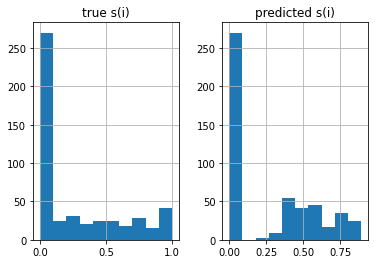

In [204]:
dfff.hist()

- - - 

#### Training s(i) independently

In [205]:
# use an odd number of trees to prevent predictions of 0.5
rf23 = RandomForestRegressor(n_estimators=11)


In [206]:
rf23.fit(X_tr, y_tr[:,0])


RandomForestRegressor(n_estimators=11)

In [207]:
y_pred23 = rf23.predict(X_te)

In [208]:
r2_score(y_te[:,0], y_pred23)

0.6344692541615196

In [209]:
dfff = pd.DataFrame({
    'ID': tedf.index,
    'true s(i)': y_te[:,0],
    'predicted s(i)': y_pred23,
})

In [210]:
dfff.set_index('ID', inplace = True)

array([[<AxesSubplot:title={'center':'true s(i)'}>,
        <AxesSubplot:title={'center':'predicted s(i)'}>]], dtype=object)

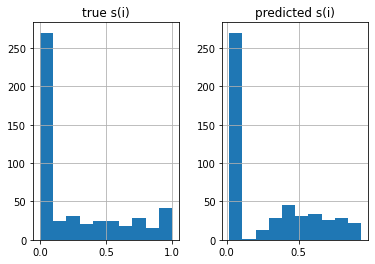

In [211]:
dfff.hist()

#### Training s(i) independently: with cross validation

In [212]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [213]:
%%time
# Fit the random search model
rf_random.fit(X_tr, y_tr[:,0])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Wall time: 5min 28s


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [214]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [215]:
best_random = rf_random.best_estimator_

In [216]:
y_predr = best_random.predict(X_te)

In [217]:
r2_score(y_te[:,0], y_predr)

0.6870716065414464

In [218]:
dfff = pd.DataFrame({
    'ID': tedf.index,
    'true s(i)': y_te[:,0],
    'predicted s(i)': y_predr,
})

In [219]:
dfff.set_index('ID', inplace = True)

array([[<AxesSubplot:title={'center':'true s(i)'}>,
        <AxesSubplot:title={'center':'predicted s(i)'}>]], dtype=object)

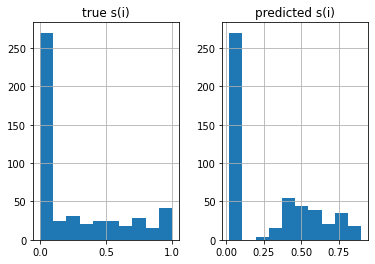

In [220]:
dfff.hist()

--------------
--------------
## 2.2) Cross validated Model : RF Classifier
- x(i)

In [221]:
rf2 = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf2, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [222]:
%%time
# Fit the random search model
rf_random.fit(X_tr, y_tr[:,1])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Wall time: 5min 27s


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [223]:
y_pred21 = rf_random.predict(X_te)

## New code Added

In [ ]:
def pre_x(y1, y2, y3, y4):
  test_new = [y1,y2,y3,y4]
  y_pred21 = rf_random.predict(test_new)  ##predicted x(i)  
  return y_pred21

## Results:

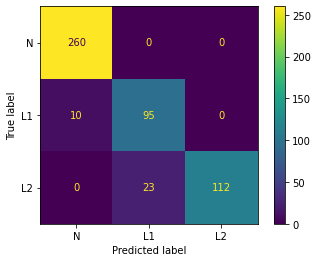

In [224]:
cm = confusion_matrix(y_te[:,1], y_pred21, labels=[0,1,2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=['N', 'L1', 'L2'])
disp.plot()

In [225]:
accuracy_score(y_te[:,1], y_pred21) 

0.934

In [226]:
f1_score(y_te[:,1], y_pred21, average='weighted') 

0.9339707456565681

In [227]:
precision_score(y_te[:,1], y_pred21, average='weighted') 

0.9398085373509102

In [228]:
recall_score(y_te[:,1], y_pred21, average='weighted') 

0.934

In [229]:
df_x = pd.DataFrame({
    'IDs': tedf.index,
    'True x(i)': y_te[:,1],
    'Predicted x(i)': y_pred21
})

In [230]:
df_x

,IDs,True x(i),Predicted x(i)
0,12,0.0,0.0
1,15,0.0,0.0
2,24,0.0,0.0
3,25,2.0,2.0
4,42,0.0,0.0
...,...,...,...
495,2472,2.0,2.0
496,2476,0.0,0.0
497,2482,2.0,2.0
498,2487,2.0,2.0


In [232]:
#df_x.to_csv('C:\Users\ashut\Desktop\BTP\website\04 model_i_model_2_2_x_i.csv')

--------------
--------------
## 3) Model : predicting s(i) with normalized counts
- RF regressor, s(i)

In [233]:
trdf['N~y(1)(i)'] = trdf['~y(1)(i)']/ trdf['N(i)']

In [234]:
trdf['N~y(2)(i)'] = trdf['~y(2)(i)']/ trdf['N(i)']
trdf['N~y(3)(i)'] = trdf['~y(3)(i)']/ trdf['N(i)']
trdf['N~y(4)(i)'] = trdf['~y(4)(i)']/ trdf['N(i)']

In [235]:
X_tr3 = np.array(trdf[['N~y(1)(i)', 'N~y(2)(i)', 'N~y(3)(i)', 'N~y(4)(i)']])

In [236]:
X_tr3.shape

(2000, 4)

In [237]:
y_tr = np.array(trdf[[  'Affected Customers s(i)', 'Lateral Anomaly Status x(i)']])

In [238]:
y_tr.shape

(2000, 2)

In [239]:
tedf['N~y(1)(i)'] = tedf['~y(1)(i)']/ tedf['N(i)']

In [240]:
tedf['N~y(2)(i)'] = tedf['~y(2)(i)']/ tedf['N(i)']
tedf['N~y(3)(i)'] = tedf['~y(3)(i)']/ tedf['N(i)']
tedf['N~y(4)(i)'] = tedf['~y(4)(i)']/ tedf['N(i)']

In [241]:
X_te3 = np.array(tedf[['N~y(1)(i)', 'N~y(2)(i)', 'N~y(3)(i)', 'N~y(4)(i)']])

In [242]:
X_te3.shape

(500, 4)

In [243]:
# use an odd number of trees to prevent predictions of 0.5
rf3 = RandomForestRegressor(n_estimators=11)


In [244]:
rf3.fit(X_tr3, y_tr[:,0])


RandomForestRegressor(n_estimators=11)

## New code Added


In [ ]:
def pre_s(y1,y2,y3,y4,N):
  tedf['N~y(1)(i)'] = y1/N
  tedf['N~y(2)(i)'] = y2/N
  tedf['N~y(3)(i)'] = y3/N
  tedf['N~y(4)(i)'] = y4/N

  X_te3 = np.array(tedf[['N~y(1)(i)', 'N~y(2)(i)', 'N~y(3)(i)', 'N~y(4)(i)']])
  y_pred3 = rf3.predict(X_te3)  ##predicted s(i)
  return y_pred3

In [245]:
y_pred3 = rf3.predict(X_te3)

In [246]:
r2_score(y_te[:,0], y_pred3)

0.8307139674475729

In [247]:
dfff = pd.DataFrame({
    'ID': tedf.index,
    'true s(i)': y_te[:,0],
    'predicted s(i)': y_pred3,
})

In [248]:
dfff.set_index('ID', inplace = True)

array([[<AxesSubplot:title={'center':'true s(i)'}>,
        <AxesSubplot:title={'center':'predicted s(i)'}>]], dtype=object)

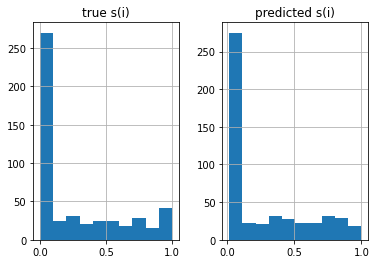

In [249]:
dfff.hist()

In [250]:
mean_squared_error(y_te[:,0], y_pred3)

0.01952525517924507

In [251]:
#rmse
mean_squared_error(y_te[:,0], y_pred3, squared = False)

0.13973279922496745

## Cross-validated

In [252]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [253]:
%%time
# Fit the random search model
rf_random.fit(X_tr3, y_tr[:,0])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Wall time: 8min 21s


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [254]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': True}

In [255]:
best_random = rf_random.best_estimator_

In [256]:
y_predr3 = best_random.predict(X_te3)

In [257]:
r2_score(y_te[:,0], y_predr3)

0.8459631562357173

In [258]:
dfff = pd.DataFrame({
    'ID': tedf.index,
    'true s(i)': y_te[:,0],
    'predicted s(i)': y_predr3,
})

In [259]:
dfff.set_index('ID', inplace = True)

array([[<AxesSubplot:title={'center':'true s(i)'}>,
        <AxesSubplot:title={'center':'predicted s(i)'}>]], dtype=object)

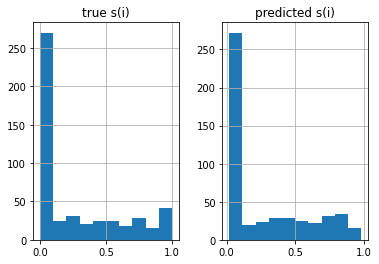

In [260]:
dfff.hist()

In [261]:
mean_squared_error(y_te[:,0], y_predr3)

0.017766431383355156

In [262]:
#rmse
mean_squared_error(y_te[:,0], y_predr3, squared = False)

0.13329077756302254

In [265]:
dfff.to_csv(r'C:\Users\ashut\Desktop\BTP\website\04 model_i_model_3_s_i.csv')

--------------
--------------
## 3.2) Model : predicting s(i) with normalized counts using x(i)'s
- RF regressor, s(i)
- Use true x(i) as an additional feature for training data.
- Use predicted x(i) as an additional feature on test data

In [266]:
X_tr32 = np.array(trdf[['N~y(1)(i)', 'N~y(2)(i)', 'N~y(3)(i)', 'N~y(4)(i)', 'Lateral Anomaly Status x(i)']])

In [267]:
X_tr32.shape

(2000, 5)

In [268]:
y_tr32 = np.array(trdf[ 'Affected Customers s(i)'])

In [269]:
y_tr32

array([0.66666667, 0.65      , 0.        , ..., 0.80555556, 0.        ,
       1.        ])

In [270]:
y_te32 = np.array(tedf[ 'Affected Customers s(i)'])

In [271]:
X_te32 = tedf[['N~y(1)(i)', 'N~y(2)(i)', 'N~y(3)(i)', 'N~y(4)(i)']]

In [272]:
X_te32['Predicted Lateral Anomaly Status x(i)'] = y_pred21

In [273]:
X_te32

,N~y(1)(i),N~y(2)(i),N~y(3)(i),N~y(4)(i),Predicted Lateral Anomaly Status x(i)
Lateral_ID (i),,,,,
12,0.0,0.000000,0.000000,0.000000,0.0
15,0.0,0.000000,0.000000,0.000000,0.0
24,0.0,0.000000,0.000000,0.000000,0.0
25,0.0,0.333333,0.000000,1.166667,2.0
42,0.0,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...
2472,0.0,0.428571,1.061224,1.551020,2.0
2476,0.0,0.000000,0.000000,0.000000,0.0
2482,0.0,0.386364,1.022727,1.681818,2.0


In [274]:
# use an odd number of trees to prevent predictions of 0.5
rf32 = RandomForestRegressor(n_estimators=11)


In [275]:
rf32.fit(X_tr32, y_tr32)


RandomForestRegressor(n_estimators=11)

In [276]:
y_pred32 = rf32.predict(X_te32)

In [277]:
r2_score(y_te32, y_pred32)

0.8149353067575444

In [278]:
dfff = pd.DataFrame({
    'ID': tedf.index,
    'true s(i)': y_te32,
    'predicted s(i)': y_pred32,
})

In [279]:
dfff.set_index('ID', inplace = True)

array([[<AxesSubplot:title={'center':'true s(i)'}>,
        <AxesSubplot:title={'center':'predicted s(i)'}>]], dtype=object)

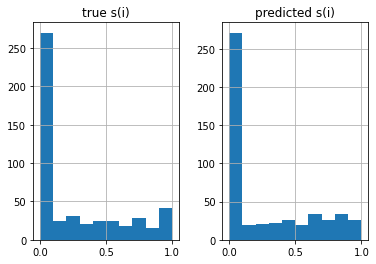

In [280]:
dfff.hist()

In [281]:
mean_squared_error(y_te32, y_pred32)

0.02134514765185125

In [282]:
#rmse
mean_squared_error(y_te32, y_pred32, squared = False)

0.146099786624934

## Cross-validated

In [283]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [284]:
%%time
# Fit the random search model
rf_random.fit(X_tr32, y_tr32)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Wall time: 6min 10s


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [285]:
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [286]:
best_random = rf_random.best_estimator_

In [287]:
y_predr32 = best_random.predict(X_te32)

In [288]:
r2_score(y_te32, y_predr32)

0.8463067090006695

In [289]:
dfff = pd.DataFrame({
    'ID': tedf.index,
    'true s(i)': y_te32,
    'predicted s(i)': y_predr32,
})

In [290]:
dfff.set_index('ID', inplace = True)

array([[<AxesSubplot:title={'center':'true s(i)'}>,
        <AxesSubplot:title={'center':'predicted s(i)'}>]], dtype=object)

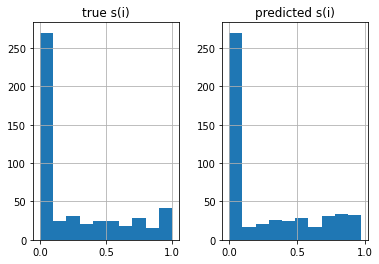

In [291]:
dfff.hist()

In [292]:
mean_squared_error(y_te32, y_predr32)

0.017726806404837512

In [293]:
#rmse
mean_squared_error(y_te32, y_predr32, squared = False)

0.13314205347987357

- # Keep this on hold!
- # Use grid search cv

--------------
--------------
## 4) Model : Poisson Modelling for s(i)

In [294]:
 X_tr1_2 =   sm.add_constant(X_tr)

In [295]:
np.shape(X_tr1_2)

(2000, 5)

In [296]:
poisson_training_results = sm.GLM(y_tr[:,0], X_tr1_2, family=sm.families.Poisson()).fit()

In [297]:
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 2000
Model:                            GLM   Df Residuals:                     1996
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1084.9
Date:                Fri, 08 Apr 2022   Deviance:                       737.21
Time:                        17:03:44   Pearson chi2:                     733.
No. Iterations:                     6   Pseudo R-squ. (CS):            0.09190
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6152      0.052    -30.791      0.0

In [298]:
 X_te1_2 =   sm.add_constant(X_te)

In [299]:
poisson_predictions = poisson_training_results.get_prediction(X_te1_2)

In [300]:
#summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()

In [301]:
predictions_summary_frame

,mean,mean_se,mean_ci_lower,mean_ci_upper
0,0.198849,0.010431,0.179421,0.220382
1,0.198849,0.010431,0.179421,0.220382
2,0.198849,0.010431,0.179421,0.220382
3,0.282793,0.016380,0.252444,0.316789
4,0.198849,0.010431,0.179421,0.220382
...,...,...,...,...
495,2.092848,0.278871,1.611817,2.717439
496,0.198849,0.010431,0.179421,0.220382
497,1.917017,0.224254,1.524235,2.411017
498,0.269368,0.013169,0.244756,0.296456


In [302]:
r2_score(y_te[:,0], predictions_summary_frame['mean']) 

0.16907483067388007

In [303]:
dfff = pd.DataFrame({
    'ID': tedf.index,
    'true s(i)': y_te[:,0],
    'predicted s(i)': predictions_summary_frame['mean']
})

In [304]:
dfff.set_index('ID', inplace = True)

array([[<AxesSubplot:title={'center':'true s(i)'}>,
        <AxesSubplot:title={'center':'predicted s(i)'}>]], dtype=object)

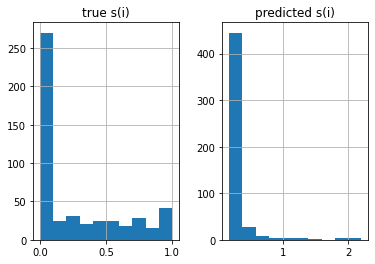

In [305]:
dfff.hist()

In [306]:
r2_score(dfff['true s(i)'], dfff['predicted s(i)'])

0.16907483067388007

## Negative Binomial Modelling:
- sample the normalized values

In [307]:
nb_training_results = sm.GLM(y_tr[:,0], X_tr1_2, family=sm.families.NegativeBinomial()).fit()

In [308]:
print(nb_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 2000
Model:                            GLM   Df Residuals:                     1996
Model Family:        NegativeBinomial   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1250.6
Date:                Fri, 08 Apr 2022   Deviance:                       595.57
Time:                        17:03:57   Pearson chi2:                     601.
No. Iterations:                    11   Pseudo R-squ. (CS):            0.07688
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6875      0.060    -28.125      0.0

In [309]:
nb_predictions = nb_training_results.get_prediction(X_te1_2)

In [310]:
#summary_frame() returns a pandas DataFrame
predictions_summary_frame = nb_predictions.summary_frame()

In [311]:
predictions_summary_frame

,mean,mean_se,mean_ci_lower,mean_ci_upper
0,0.184973,0.011099,0.164451,0.208057
1,0.184973,0.011099,0.164451,0.208057
2,0.184973,0.011099,0.164451,0.208057
3,0.270812,0.019621,0.234961,0.312132
4,0.184973,0.011099,0.164451,0.208057
...,...,...,...,...
495,3.419126,0.635806,2.374812,4.922673
496,0.184973,0.011099,0.164451,0.208057
497,3.082723,0.515828,2.220773,4.279224
498,0.276608,0.015900,0.247137,0.309594


In [312]:
r2_score(y_te[:,0], predictions_summary_frame['mean'])

-0.30565687880105785

In [313]:
dfff = pd.DataFrame({
    'ID': tedf.index,
    's(i)': y_te[:,0],
    'predicted s(i)': predictions_summary_frame['mean']
})

In [314]:
dfff.set_index('ID', inplace = True)

array([[<AxesSubplot:title={'center':'s(i)'}>,
        <AxesSubplot:title={'center':'predicted s(i)'}>]], dtype=object)

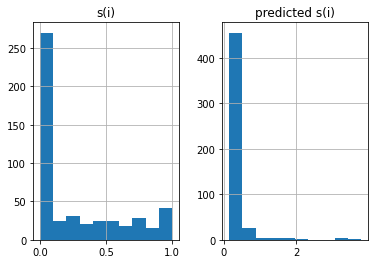

In [315]:
dfff.hist()

In [316]:
r2_score(dfff['s(i)'], dfff['predicted s(i)'])

-0.30565687880105785

## Conclusions:

- x(i): Use random search, cross-validated, RF classifier on original ~y(i)(j)'s
- s(i): Use random search, cross-validated, RF regressor on normalised N~y(i)(j)'s

## Try:
- NN